# Implementation of convolutional neural network using Keras

COMP42015: Learning from Data

Durham University, Department of Computer Science

2023-24

<strong>Version 1.0</strong>

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam

2023-11-19 19:32:46.181668: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### The MNIST dataset

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It has a training set of 60,000 examples, and a test set of 10,000 examples. Each sample of the MNIST dataset is a 28x28 pixels greyscale image, with each pixel having a value in the range [0, 255]. Samples can belong to one of the 10 available classes (0-9).

We can load it directly from Keras using the [tensorflow.keras.datasets.mnist.load_data()](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) function.

In [2]:
(X_mnist_train, Y_mnist_train), (X_mnist_test, y_mnist_test) = mnist.load_data()

print('Training data:\t', str(X_mnist_train.shape))
print('Test data:\t', str(X_mnist_test.shape))
print('Training labels:', str(Y_mnist_train.shape))
print('Test labels:\t', str(y_mnist_test.shape))

Training data:	 (60000, 28, 28)
Test data:	 (10000, 28, 28)
Training labels: (60000,)
Test labels:	 (10000,)


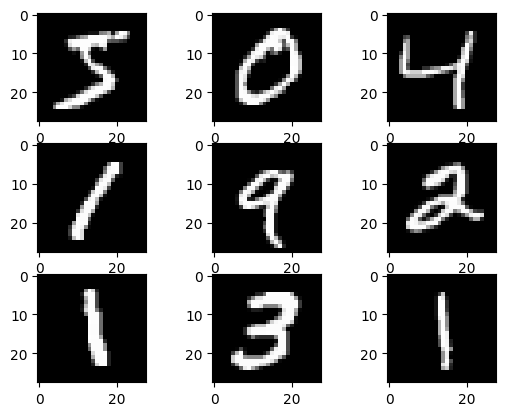

In [10]:
import matplotlib.pyplot as plt

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)
ax1.imshow(X_mnist_train[0], cmap='gray')
ax2.imshow(X_mnist_train[1], cmap='gray')
ax3.imshow(X_mnist_train[2], cmap='gray')
ax4.imshow(X_mnist_train[3], cmap='gray')
ax5.imshow(X_mnist_train[4], cmap='gray')
ax6.imshow(X_mnist_train[5], cmap='gray')
ax7.imshow(X_mnist_train[6], cmap='gray')
ax8.imshow(X_mnist_train[7], cmap='gray')
ax9.imshow(X_mnist_train[8], cmap='gray')
plt.show()

In [6]:
model = Sequential(name='MNIST-CNN')
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=1, kernel_size=3,padding='same',  activation='relu'))
model.add(Conv2D(filters=2, kernel_size=5,padding='same',  activation='relu'))
model.add(Conv2D(filters=1, kernel_size=3,padding='valid', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=X_mnist_train,y=Y_mnist_train,validation_split=0.15,epochs=10)

Model: "MNIST-CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 1)         10        
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 2)         52        
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 1)         19        
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 1)        0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 169)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1700      
                                                         

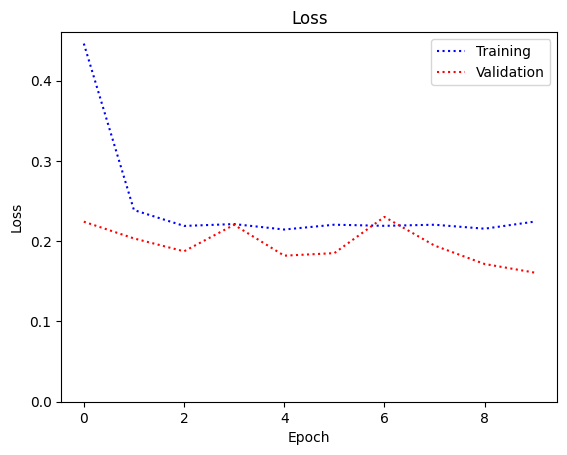

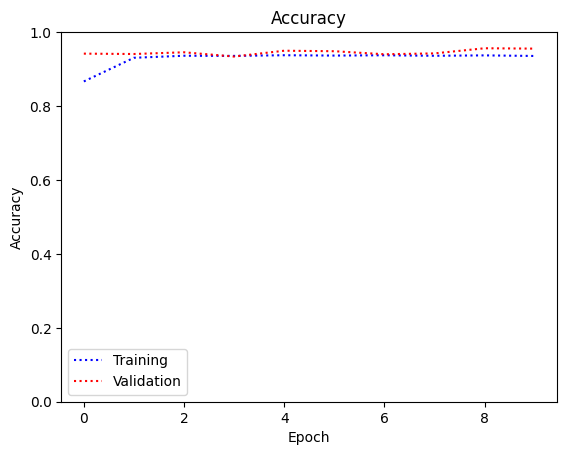

In [7]:
f, (ax1) = plt.subplots(1, 1)
ax1.plot(history.history['loss'],color='blue',linestyle = 'dotted')
ax1.plot(history.history['val_loss'],color='red',linestyle = 'dotted')
ax1.set(title='Loss',xlabel='Epoch',ylabel='Loss')
ax1.set_ylim(bottom=0)
ax1.legend(['Training','Validation'])
plt.show()

f, (ax1) = plt.subplots(1, 1)
ax1.plot(history.history['accuracy'],color='blue',linestyle = 'dotted')
ax1.plot(history.history['val_accuracy'],color='red',linestyle = 'dotted')
ax1.set(title='Accuracy',xlabel='Epoch',ylabel='Accuracy')
ax1.set_ylim(0,1)
ax1.legend(['Training','Validation'])
plt.show()